In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA

import seaborn as sns
import pandas as pd

from sklearn.datasets import make_blobs
import os.path as path
import wget

# Dimension reduction using PCA

In [7]:
X1, Y1 = make_blobs(n_features = 10, n_samples=100, centers = 5, random_state=1, cluster_std=1)
print(X1.shape)
print(Y1.shape)

(100, 10)
(100,)


In [9]:
df = pd.DataFrame(X1, index=range(X1.shape[0]), columns=range(X1.shape[1]))
print(df)

           0          1          2         3         4         5         6  \
0  -0.821084   3.329952  -5.776907  8.764404 -9.167500  3.671818 -1.377405   
1  -3.154903   3.256495  -5.292969  7.378172 -9.568233  3.233891 -2.587819   
2  -0.385804   6.373592 -11.855694 -2.717185 -5.437231 -7.815216 -7.474064   
3   4.449153  10.379054  -5.958629  2.147119  7.251937  9.121089 -6.989410   
4  -1.410761   4.109849  -9.502501 -4.128052 -6.078547 -7.939694 -4.084096   
..       ...        ...        ...       ...       ...       ...       ...   
95 -8.524188  -1.443474   8.889419  0.531630  4.856095 -2.459129  2.548915   
96  0.245099   5.517547  -9.338663 -5.580787 -6.462563 -7.732946 -5.463844   
97 -1.256068   5.000068 -11.092624 -3.783966 -6.324326 -9.106929 -6.541014   
98 -9.590005  -2.190290   9.018439 -0.065232  4.368706 -3.685687  4.051284   
99 -1.990914   2.954420  -3.856331  7.615758 -9.931405  3.759517 -1.636739   

            7          8         9  
0    0.440525  -6.356257 -

In [10]:
# Agregamos el target
df['y'] = Y1
print(df)

           0          1          2         3         4         5         6  \
0  -0.821084   3.329952  -5.776907  8.764404 -9.167500  3.671818 -1.377405   
1  -3.154903   3.256495  -5.292969  7.378172 -9.568233  3.233891 -2.587819   
2  -0.385804   6.373592 -11.855694 -2.717185 -5.437231 -7.815216 -7.474064   
3   4.449153  10.379054  -5.958629  2.147119  7.251937  9.121089 -6.989410   
4  -1.410761   4.109849  -9.502501 -4.128052 -6.078547 -7.939694 -4.084096   
..       ...        ...        ...       ...       ...       ...       ...   
95 -8.524188  -1.443474   8.889419  0.531630  4.856095 -2.459129  2.548915   
96  0.245099   5.517547  -9.338663 -5.580787 -6.462563 -7.732946 -5.463844   
97 -1.256068   5.000068 -11.092624 -3.783966 -6.324326 -9.106929 -6.541014   
98 -9.590005  -2.190290   9.018439 -0.065232  4.368706 -3.685687  4.051284   
99 -1.990914   2.954420  -3.856331  7.615758 -9.931405  3.759517 -1.636739   

            7          8         9  y  
0    0.440525  -6.35625

In [11]:
Dict = {0:'x1',1:'x2',2:'x3',3:'x4',4:'x5',5:'x6',6:'x7',7:'x8',8:'x9',9:'x10'}
df.rename(columns=Dict, inplace=True)

In [13]:
for i in range(10):
    for j in range(10):
        if i!=j:
            plot = sns.lmplot( x=Dict[i], y=Dict[j], data=df, fit_reg=False,hue='y', legend=True ,scatter_kws={'s':100})
            plt.savefig('Figures/%d_%d'%(i,j))
            plt.close()

In [26]:
pca = PCA(n_components=4)
pc = pca.fit_transform(X1)

In [27]:
df1 = pd.DataFrame( {'var':pca.explained_variance_ratio_, 'PC':['PC1','PC2','PC3','PC4']} )
print(df1)

        var   PC
0  0.382799  PC1
1  0.331440  PC2
2  0.183093  PC3
3  0.084860  PC4


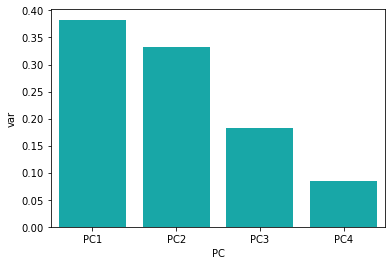

In [28]:
sns.barplot(x='PC',y='var', data=df1, color='c')

In [29]:
dfpc = pd.DataFrame(data=pc, columns=['PC1','PC2','PC3','PC4'])
dfpc['Cluster'] = Y1

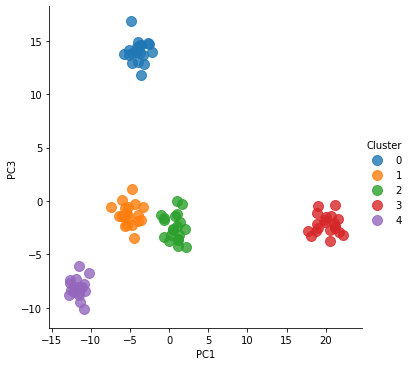

In [31]:
sns.lmplot( x='PC1', y='PC3', data=dfpc, fit_reg=False,hue='Cluster', legend=True,scatter_kws={'s':100} )